In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
from collections import defaultdict
import gymnasium as gym
from gymnasium import spaces
from matplotlib.patches import Rectangle

In [2]:
class WarehouseRobotEnv(gym.Env):
    metadata = {"render_modes": ["human"]}

    def __init__(self):
        super(WarehouseRobotEnv, self).__init__()
        
        # Defining action space (0 = up, 1 = right, 2 = down, 3 = left, 4 = pickup, 5 = dropoff)
        self.action_space = spaces.Discrete(6)
        self.grid_size = (6, 6)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(self.grid_size[0]),
            spaces.Discrete(self.grid_size[1]),
            spaces.Discrete(2)  
        ))
        
        self.state = ((0, 0), 0)  
        self.pickup_point = (0, 0)
        self.dropoff_point = (5, 5)
        self.obstacles = [(2, 2), (3, 3), (4, 4)]
        
        self.default_reward = -1  
        self.rewards = {
            self.pickup_point: 25,  
            self.dropoff_point: 100  
        }
        self.obstacle_penalty = -20

        self.terminated = False

    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed)
        self.state = ((0, 0), 0)  # Starting position, not carrying
        self.terminated = False
        return self.state, {}  # Observation and empty info

    def step(self, action):
        (x, y), carrying = self.state
        
        # Move the agent
        if action == 0:  # Up
            x = max(0, x - 1)
        elif action == 1:  # Right
            y = min(self.grid_size[1] - 1, y + 1)
        elif action == 2:  # Down
            x = min(self.grid_size[0] - 1, x + 1)
        elif action == 3:  # Left
            y = max(0, y - 1)
        elif action == 4:  # Pickup
            if (x, y) == self.pickup_point and not carrying:
                carrying = 1
        elif action == 5:  # Dropoff
            if (x, y) == self.dropoff_point and carrying:
                carrying = 0
                self.terminated = True


        self.state = ((x, y), carrying)

     
        if (x, y) in self.obstacles:
            reward = self.obstacle_penalty
        elif (x, y) == self.pickup_point and carrying == 1:
            reward = self.rewards[self.pickup_point]
        elif (x, y) == self.dropoff_point and carrying == 0 and self.terminated:
            reward = self.rewards[self.dropoff_point]
        else:
            reward = self.default_reward

        terminated = self.terminated
        truncated = False  # No time limit for this environment
        
        return self.state, reward, terminated, truncated, {}

    def render(self, mode="human"):

        grid = np.zeros(self.grid_size)  # Create a blank grid
        
        # Fill in obstacles, pickup, and dropoff
        for x, y in self.obstacles:
            grid[x, y] = -1  # Obstacles
        
        px, py = self.pickup_point
        dx, dy = self.dropoff_point
        grid[px, py] = 2  # Pickup
        grid[dx, dy] = 3  # Dropoff
        (x, y), carrying = self.state
        grid[x, y] = 1 if not carrying else 4  

        plt.imshow(grid, cmap="cool", origin="upper")
        plt.colorbar(label="Grid Values")
        plt.title("Warehouse Robot Environment")
        plt.xticks(range(self.grid_size[1]))
        plt.yticks(range(self.grid_size[0]))
        plt.show()



Initial State: ((0, 0), 0)
Step 1: Action: 5, State: ((0, 0), 0), Reward: -1


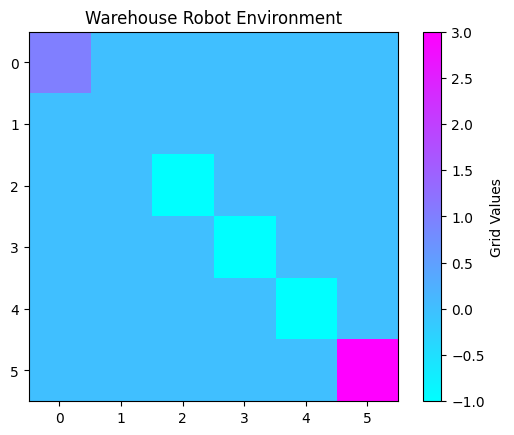

Agent failed to reach
Step 2: Action: 1, State: ((0, 1), 0), Reward: -1


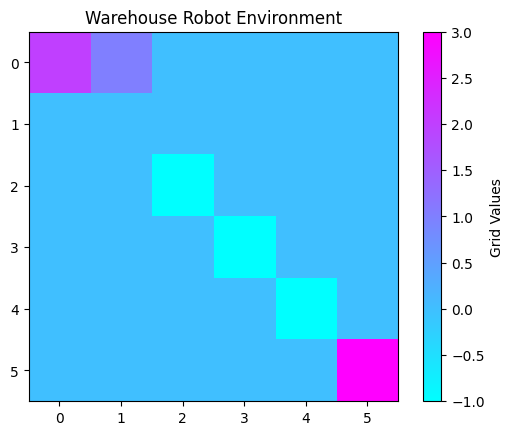

Agent failed to reach
Step 3: Action: 1, State: ((0, 2), 0), Reward: -1


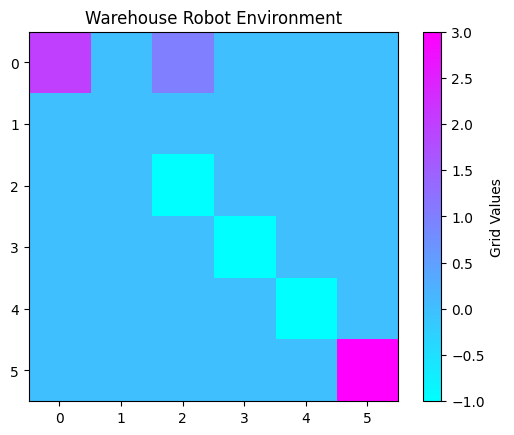

Agent failed to reach
Step 4: Action: 5, State: ((0, 2), 0), Reward: -1


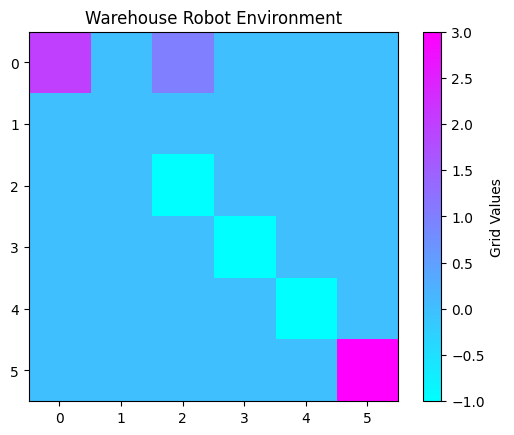

Agent failed to reach
Step 5: Action: 5, State: ((0, 2), 0), Reward: -1


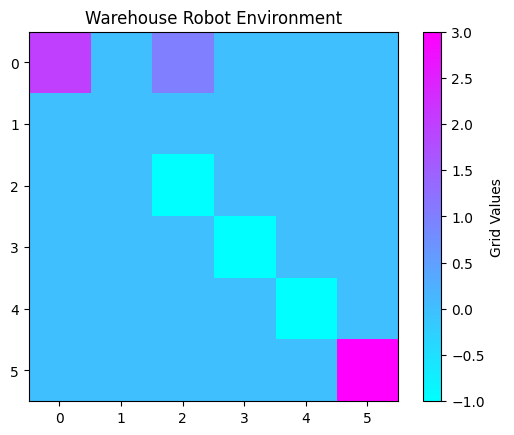

Agent failed to reach
Step 6: Action: 0, State: ((0, 2), 0), Reward: -1


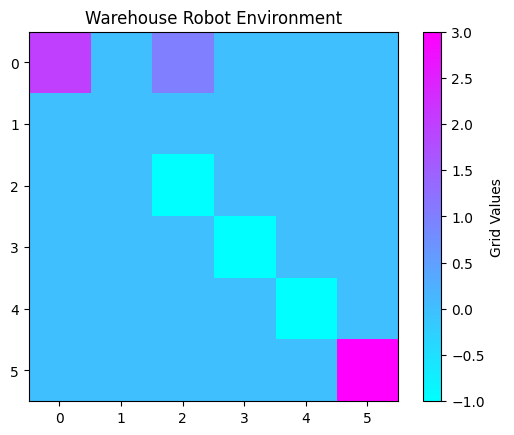

Agent failed to reach
Step 7: Action: 0, State: ((0, 2), 0), Reward: -1


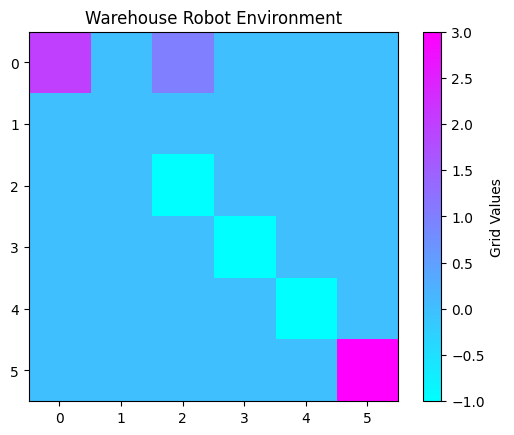

Agent failed to reach
Step 8: Action: 2, State: ((1, 2), 0), Reward: -1


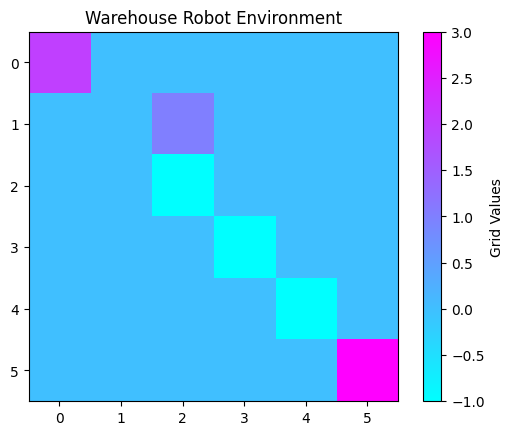

Agent failed to reach
Step 9: Action: 1, State: ((1, 3), 0), Reward: -1


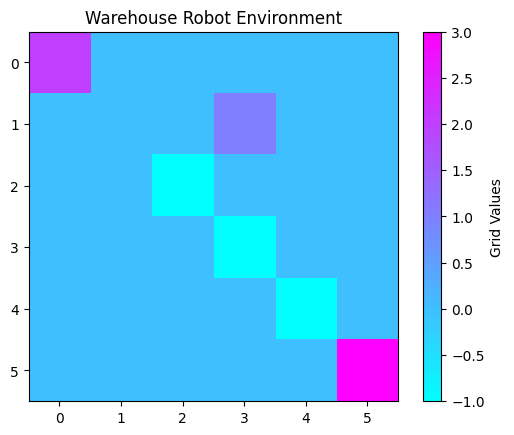

Agent failed to reach
Step 10: Action: 2, State: ((2, 3), 0), Reward: -1


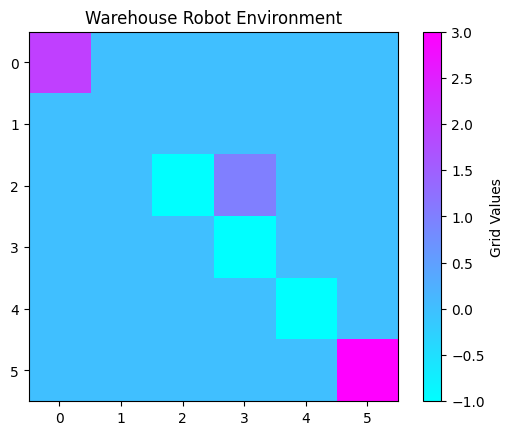

Agent failed to reach


In [3]:
env = WarehouseRobotEnv()
state, info = env.reset()
print(f"Initial State: {state}")

for step in range(10):
    action = env.action_space.sample()  
    state, reward, terminated, truncated, _ = env.step(action)
    print(f"Step {step + 1}: Action: {action}, State: {state}, Reward: {reward}")
    env.render()
    if terminated:
        print("Task Complete!")
        break
    else:
        print("Agent failed to reach")

In [4]:
from collections import defaultdict

# Initialize the Q-table
q_table = defaultdict(lambda: defaultdict(float))

# Print the initial Q-Table for a few states
print("Initial Q-Table:")
for x in range(6):
    for y in range(6):
        for carrying in [0, 1]:  
            state = (x, y, carrying)
            for action in range(6):  
                q_table[state][action] = 0.0  
            print(f"State: {state}, Actions: {dict(q_table[state])}")


Initial Q-Table:
State: (0, 0, 0), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 0, 1), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 1, 0), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 1, 1), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 2, 0), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 2, 1), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 3, 0), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 3, 1), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 4, 0), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 4, 1), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 5, 0), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (0, 5, 1), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
State: (1, 0, 0), Actions: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class SARSA_Agent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma  
        self.epsilon = epsilon  
        self.epsilon_decay = epsilon_decay  
        self.epsilon_min = epsilon_min 
        grid_size = env.grid_size[0] * env.grid_size[1] 
        carrying_states = 2 
        self.num_states = grid_size * carrying_states  
        self.num_actions = env.action_space.n 
        
        
        self.q_table = np.zeros((self.num_states, self.num_actions))

    def state_to_index(self, state):
        (x, y), carrying = state
        grid_idx = x * self.env.grid_size[1] + y  # Convert (x, y) to a 1D index
        return grid_idx * 2 + carrying  # Incorporate carrying state

    def choose_action(self, state):
        state_idx = self.state_to_index(state)
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.num_actions)  # Explore
        return np.argmax(self.q_table[state_idx])  # Exploit

    def train(self, episodes=500, max_steps=50):
        total_rewards = []
        epsilon_values = []

        for episode in range(episodes):
            state, _ = self.env.reset()
            action = self.choose_action(state)
            total_reward = 0

            for _ in range(max_steps):
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                next_action = self.choose_action(next_state)
                state_idx = self.state_to_index(state)
                next_state_idx = self.state_to_index(next_state)
                self.q_table[state_idx, action] += self.alpha * (
                    reward
                    + self.gamma * self.q_table[next_state_idx, next_action]
                    - self.q_table[state_idx, action]
                )

                state, action = next_state, next_action
                total_reward += reward

                if terminated or truncated:
                    break
            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)

            total_rewards.append(total_reward)
            epsilon_values.append(self.epsilon)

        return total_rewards, epsilon_values

    def evaluate_policy(self, episodes=10, max_steps=50):
        greedy_rewards = []

        for episode in range(episodes):
            state, _ = self.env.reset()
            total_reward = 0

            for _ in range(max_steps):
                state_idx = self.state_to_index(state)
                action = np.argmax(self.q_table[state_idx])  # Always choose the best action
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                total_reward += reward

                if terminated or truncated:
                    break

                state = next_state

            greedy_rewards.append(total_reward)

        return greedy_rewards


In [6]:
env = WarehouseRobotEnv()  
agent = SARSA_Agent(
    env=env,
    alpha=0.1,         
    gamma=0.99,         
    epsilon=1.0,        
    epsilon_decay=0.995,  
    epsilon_min=0.1    
)

episodes = 500
max_steps = 50
total_rewards, epsilon_values = agent.train(episodes=episodes, max_steps=max_steps)


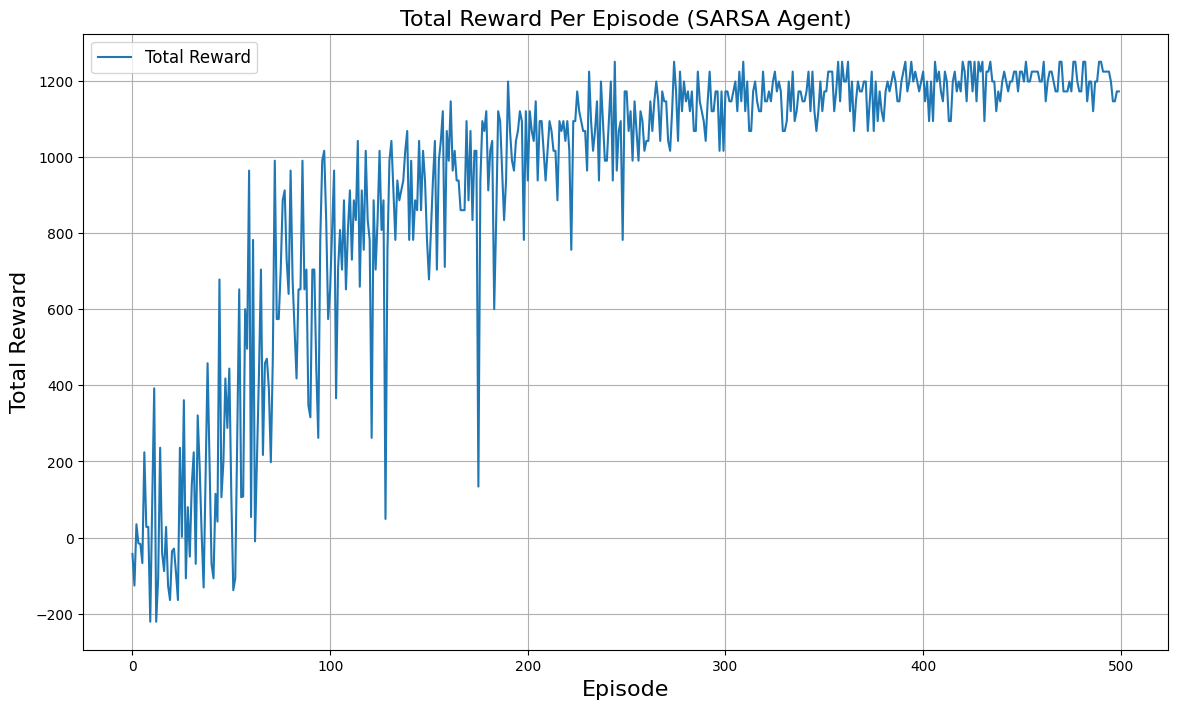

In [7]:
plt.figure(figsize=(14, 8))
plt.plot(total_rewards, label="Total Reward")
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Total Reward", fontsize=16)
plt.title("Total Reward Per Episode (SARSA Agent)", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


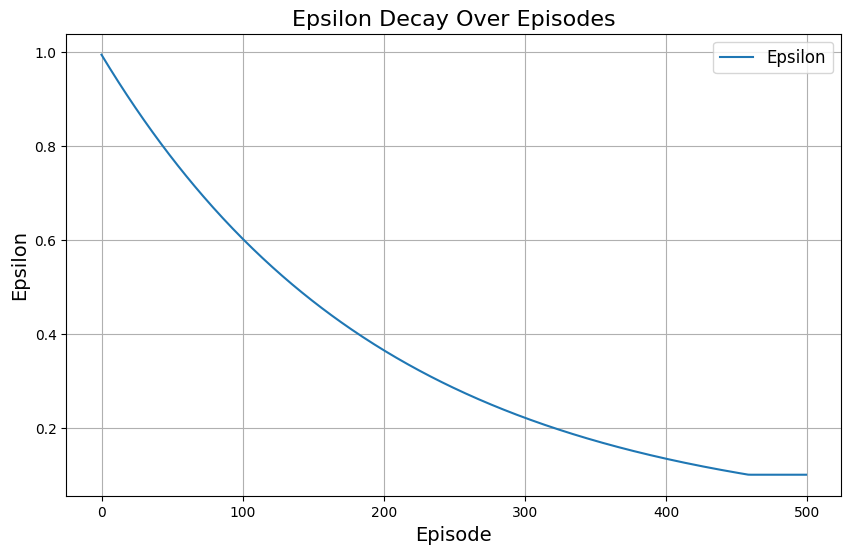

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, label="Epsilon")
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Epsilon", fontsize=14)
plt.title("Epsilon Decay Over Episodes", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


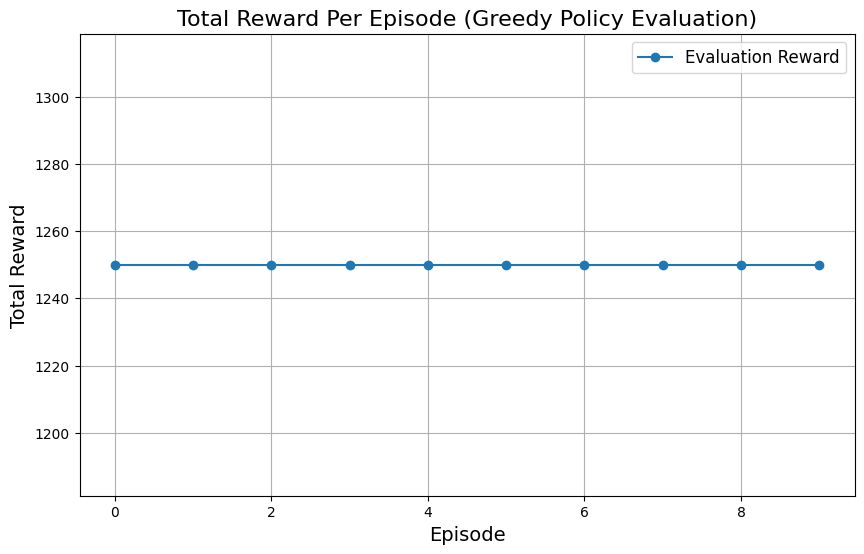

In [9]:
evaluation_rewards = agent.evaluate_policy(episodes=10, max_steps=50)
plt.figure(figsize=(10, 6))
plt.plot(evaluation_rewards, marker='o', label="Evaluation Reward")
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Total Reward", fontsize=14)
plt.title("Total Reward Per Episode for Greedy Policy Evaluation", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()